In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

# Fitting MLP s2s

## Fit1

In [3]:
query={'experiment':'mlps2sfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full'], data=['lag'])

In [4]:
#results.exp_df 

In [5]:
a=results.exp_df.groupby(['site','drop','full','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff475882208>,
      dtype=object)

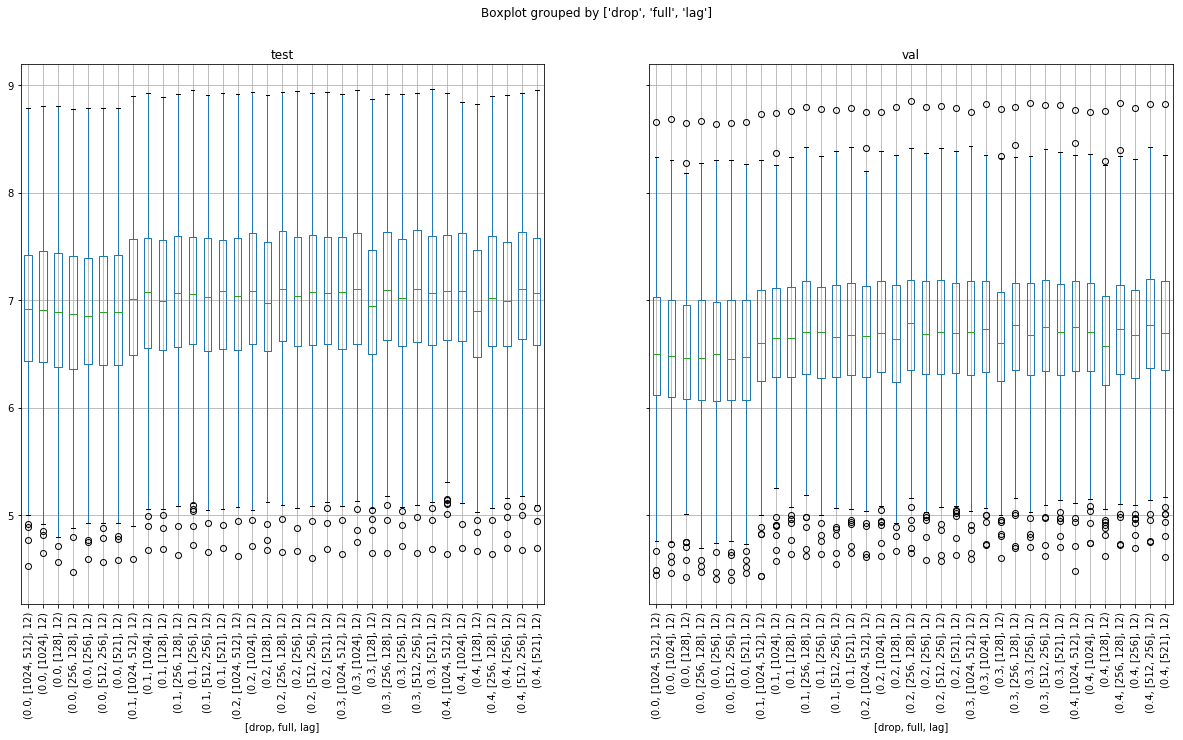

In [6]:
a[a['lag']=='12'].boxplot(by=['drop', 'full', 'lag'],figsize=(20,10), rot=90)

In [7]:
b =a.groupby(by=['full', 'drop','lag'],as_index=False).mean()
b.style.highlight_max()

,full,drop,lag,test,val
0,"[1024, 512]",0.0,12,6.85977,6.53124
1,"[1024, 512]",0.0,18,6.80429,6.47341
2,"[1024, 512]",0.1,12,6.94709,6.62673
3,"[1024, 512]",0.1,18,6.89015,6.56875
4,"[1024, 512]",0.2,12,6.98198,6.68287
5,"[1024, 512]",0.2,18,6.9258,6.6208
6,"[1024, 512]",0.3,12,7.00668,6.71684
7,"[1024, 512]",0.3,18,6.9493,6.6559
8,"[1024, 512]",0.4,12,7.01817,6.74003
9,"[1024, 512]",0.4,18,6.96396,6.68174


Best models 12/512-256/(0.3,0.4)

## Fit 2

In [28]:
query={'experiment':'mlps2sfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'activation'], data=['lag'])

In [29]:
a=results.exp_df.groupby(['site','activation','drop','full','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff474a61fd0>,
      dtype=object)

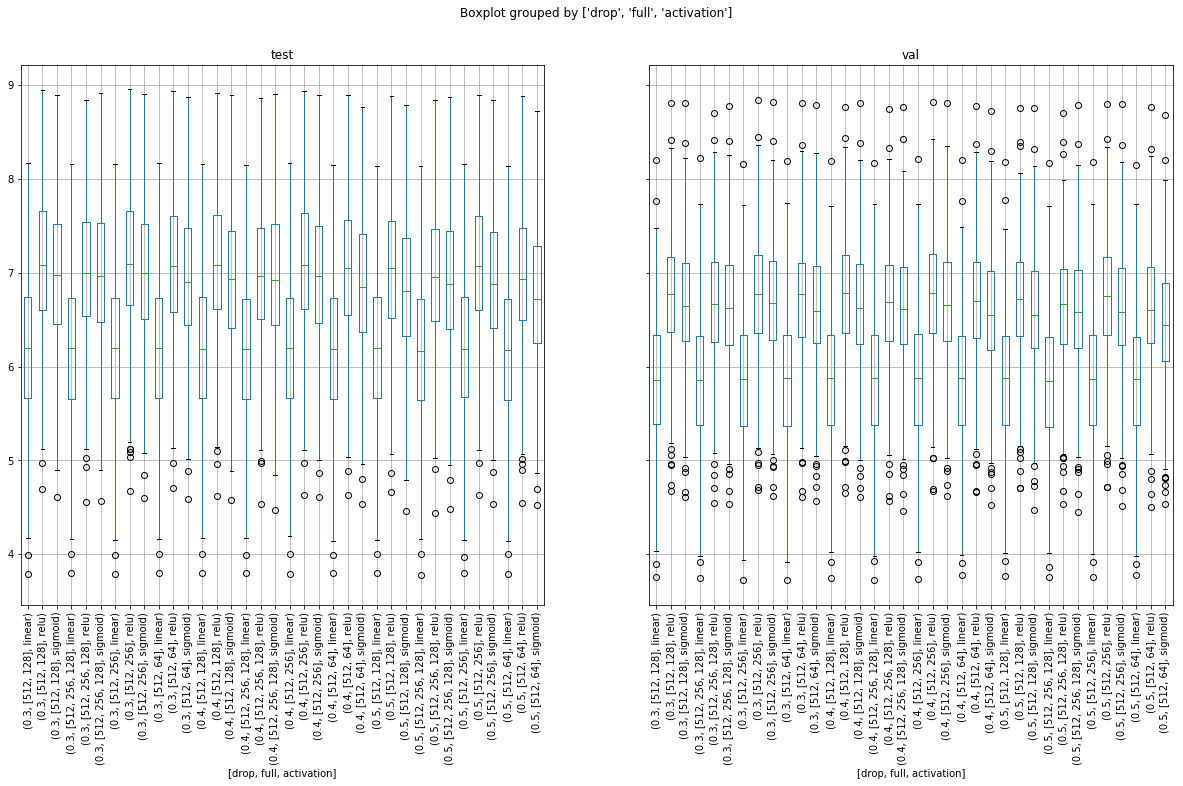

In [30]:
a.boxplot(by=['drop', 'full', 'activation'],figsize=(20,10), rot=90)

In [31]:
b =a.groupby(by=['activation','full', 'drop','lag'],as_index=False).mean()
b.style.highlight_max()

,activation,full,drop,lag,test,val
0,linear,"[512, 128]",0.3,12,6.15236,5.85215
1,linear,"[512, 128]",0.4,12,6.14948,5.85248
2,linear,"[512, 128]",0.5,12,6.14253,5.84969
3,linear,"[512, 256, 128]",0.3,12,6.14588,5.8468
4,linear,"[512, 256, 128]",0.4,12,6.139,5.84455
5,linear,"[512, 256, 128]",0.5,12,6.12334,5.83767
6,linear,"[512, 256]",0.3,12,6.15549,5.85282
7,linear,"[512, 256]",0.4,12,6.15232,5.85478
8,linear,"[512, 256]",0.5,12,6.14873,5.85163
9,linear,"[512, 64]",0.3,12,6.14762,5.84585
